In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
def get_unique_combo(string ,N):
    # Find unique N-letter combo within a str.
    # For example, if str = "ABC" and N = 2,
    # unique_combo = {"AB", "BC"}
    str_list = list(string)
    unique_combo = list()
    for i in range(len(str_list)-N+1):
        this_combo = ''.join(str_list[i:i+N])
        unique_combo.append(this_combo)
    unique_combo = list(set(unique_combo))
    return unique_combo

def strfind(str1, str2):
    # Find the location of the occurrences of str2 within str1.
    # For example, if str1="ABCDEBC" and str2="BC",
    # then output is [1,5].
    index = list()
    str1 = list(str1)
    str2 = list(str2) 
    assert len(str1) >= len(str2)
    N = len(str2)
    for i in range(len(str1) - N + 1):
        if str1[i:i + N] == str2:
            index.append(i)
    return index

assert set(("AB","BC")) == set(get_unique_combo("ABC",2))
assert strfind("ABCDEBC","BC")==list([1,5])


In [122]:
def distinguish_sol_nosol(string, ans, N=2):
    sol_nosol = np.zeros(len(string) - N + 1)
    ans_combo = get_unique_combo(ans, N)
    for i in range(len(string) - N + 1):
        if string[i:i + N] in ans_combo:
            sol_nosol[i] = 1
    return sol_nosol

In [315]:
def analyze_Ngram(string, ans="", N=2, fig=True):
    # Analyze Ngrams.
    # Visualize the occurence of Ngrams within str with | symbols 
    # within a temporal series, str.
    # If a reference str (ans) is given the Ngrams that occur
    # within ans will be displayed with red |.
    
    unique_combo = get_unique_combo(string, N)
    ans_combo = get_unique_combo(ans, N)
    num = list()  # Number of Ngrams.
    ind = list()  # location of Ngrams within the str.
    for this_combo in unique_combo:
        this_index = strfind(string, this_combo)
        num.append(len(this_index))  # Record how many occurences.
        ind.append(this_index)
    
    # Reorder lists based on number of occurences.
    ordering = list(np.argsort(np.array(num)))  # very clever -jm
    num = [num[i] for i in ordering]
    ind = [ind[i] for i in ordering]
    unique_combo = [unique_combo[i] for i in ordering]

    # Make a plot.
    if (fig):  # why parentheses? -jm
        plt.figure(figsize=(4,np.round(0.2 * len(unique_combo))))
        plt.subplot(1, 4, (1, 3))
        
        for i, this_combo in enumerate(unique_combo):
            this_index = ind[i]
            print(this_index)
            if this_combo in ans_combo:
                print(np.zeros(len(this_index)) + i,'r|')
                plt.plot(this_index,np.zeros(len(this_index)) + i,'r|')
            else:
                plt.plot(this_index,np.zeros(len(this_index))+i,'k|')
        plt.ylim((-0.5,len(unique_combo)-0.5))
        plt.yticks(np.arange(len(unique_combo)),unique_combo)
        plt.ylabel('Combo')
        plt.xlabel('Order of Fixation')
        plt.title(ans)

        num = np.array(num)
        num_axis = np.arange(len(num))
        plt.subplot(1, 4, 4)
        plt.barh(num_axis,num,1)
        plt.ylim((-0.5,len(unique_combo)-0.5))
        plt.yticks(np.arange(len(unique_combo)),'')
        plt.xticks(np.arange(0,max(num)+2,5))
        plt.xlabel('Count')         
    

[0]
[1]
[3, 5]
[2. 2.] r|
[2, 4]


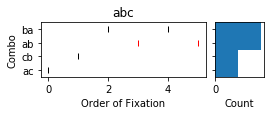

In [316]:
analyze_Ngram('acbabab', 'abc')

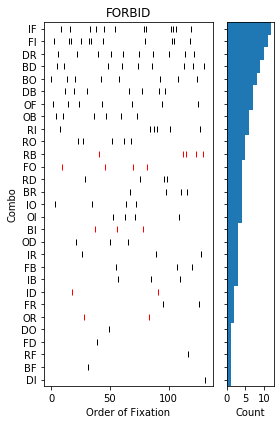

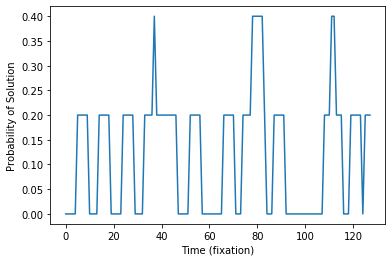

In [125]:
# Sample analysis for one stimulus.


ans = 'FORBID'
st = 'bofiobdriFobdboFifidbodrofirorDbfifiobiFdrbofIfobdodrOifbibobDroiodbrofoiobdrDbififoribdriridbofrdbRdrifif\
ifboibrbdrbrfifbdrbofRirbdi'
st = st.upper()


unique_combo, num, ind = analyze_Ngram(st, ans=ans)

sol_nosol = distinguish_sol_nosol(st, ans)
window_size = 5
convfilter = np.ones(window_size) / window_size
plt.plot(np.convolve(sol_nosol, convfilter, mode='valid'))  # extremely clever -jm
plt.ylabel('Probability of Solution')
plt.xlabel('Time (fixation)')
plt.show()



In [24]:
# Get data.
ans = 'HOCKEY'
str = 'KEHCOYOKEHEOKEHCHEKYKEKOEHYHCEOHEYECEHEOKEYEYOCHOHKEHEHOCEKEYHKY' 

ans = 'MOHAWK'
str = 'OKOAHMWKWOAHMWMHAOKOKMKOKWHOAHMWKOKAHWKOKMHAHMHAMWKOAHMWMWKOHWHOWHOKMAKMKAHMKOHWKAHWHWMAHKOWAWAWAWAOHAOKMHAKMKOHAKWK'

ans = 'WINDEX'
str = 'DWENWXINDEXDWDNWDWINEDEXWXWDNEIWDWXENDWIWDNDEXWIXEDENDEX'

ans = 'BUCKLE'
str = 'CUKBEUCBCUKCLKELUCBCUCKELELCBUKCKEL'

ans = 'JUMBLE'
str = 'BLMJEUBLBMLJEMEBUJLMEJBJLUMELUJUMLBE'

ans = 'JOURNAL'
str = 'AROJLUNULAROJLJORANULNULJORNAOJORANULUNARORAORJLANARANUJRUOJORANLJLUNANUJONAUNAROAJLRANULNRONUNURUORJORLORAJORAUOROJAROJLUJLUNARNUJNAOROANOORANUANLJORLUNJNAUJLUJAJUNURA'

ans = 'BOTHER'
str = 'HEBTORHRBEHETOBEHRRBEHRBHRTREBHBRETBRHBROOTEHRTRBOHEBEHRORHEBOHRBEHBOHETORHOTHROHBROTBTORHTBEHEBHREBHRHEHREHBHBEHHBEBRHBRHORHBRHEOEHOBEHRTBEHOROTHTHBRHEBRHOBTOBEBRHOTEOHEOHERRHTBETOEHRHEORORHBOHEBEOETROEHBTRHEBTORHOERHROHRORHERHOTHEBEORERBRHHRTROTBEBHBTEOHEBERHRERORH'

ans = 'CANDLE'
str = 'DNCANDNCCADNDEANDECANADEANDAELNDACADALEDEDNDEDNDCALAEDLCDCADALDADEDENCALALEDENCNLNACEDEDADEAEDNDELAEDANALCAEDEANENEDDALCALALACNEELNAAELAEEADENEDENCDEDNDANEACENADDNDLELELACENLACALANDCDALACNDEANLACANELENALNELCDNACADEELDEEALEACDNCNCACNLEDNALACNDNCALCEADNALNCLNDEACDEADNELALACNDELNDEALADEACELADELENDADNLANCALCNDADALAEAENCADENLELNCLENADL'

ans = 'CINEMA'
str = 'NMANAICENMAINEENMEACNMNANMECMACEMNAIANACEMMNMCMNANMNEMAEMAENCEAICEMAINECEANMENAMMAEMNMEMNANMEMNANAMCNMANMNMEMNANMCIAINMNANMEMNEAEMNMNMNACIANMEMANMANAIEMECMNANMENAIEMEIANIANMIC'

ans = 'JOURNAL'
str = 'AROJLUNULAROJLJORANULNULJORNAOJLJRANULUNARORAOROJLANARANULJRNUAOJORANLJLUNANUJONAUNAROJRALJLORANULUNRONAUNURUORJORLORAJORANUOJROJAROJALUJLUNARANLJNAUOROANOLORANUAJNLJORLUNAJORANAUOLUJAJUNUORAUJ'

ans = 'LAUNCH'
str = 'huanhulcuhnlauHnlnuhcAuanluacachaulchnuaClcuhuanhuanlcuhnauluhncnhUalnauhucnluNhcauuhualcncuahlnachualuHncunuh'
str = str.upper()

#ans = 'JOURNAL'
#str = 'ARANULJORARNUOJORAROJLJRARNNULUNARONUJOANANANAROJORALANORALRORANURAROLNARORANUJLNARNAUORORORARORANUJRAOJNLOROJLARANAUROANAROAROLNARUJRANUNARORAJUNARARLNROLJORANUNANUROJRLJORANULNROROAJORORAROANURANULROLOAROLARORANUROANROOANROARANULROAULJORAROANULJORARJORAROARNUOLJRARNONUORAULJLARORARORAROJLNARORANANUOJANULNAROUNAROJRNLARAOJLARORJLRARJOROROANORARNARAOJAORJLULJORALRANARANORNANAROARAJLOULARONOUJRORANUANULRORJLAJANANUJLNAULJNJORNANARARARNORJORARORNURAORNLORANLJRARNULURARARJORANAUARA'


Shape of bigram_table
(26, 26)


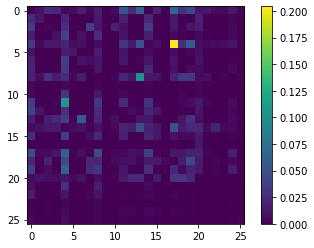

Very common bigram
ER: 0.20438


In [26]:
# Copied and pasted from the csv file from Mathematica.
bigram_table = np.array([
[0.0006635700066357001, 0.008958195089581952, 0.02687458526874585, 0.0225613802256138, 0.0026542800265428003, 0.005972130059721301, 0.017916390179163903, 0.0046449900464499, 0.015262110152621102, 0.0006635700066357001, 0.005972130059721301, 0.0537491705374917, 0.02687458526874585, 0.0630391506303915, 0.0013271400132714001, 0.0185799601857996, 0.0006635700066357001, 0.06801592568015925, 0.029860650298606503, 0.04346383543463835, 0.010617120106171201, 0.012939615129396152, 0.0063039150630391505, 0.0043132050431320505, 0.013603185136031851, 0.003981420039814201]
,[0.0245520902455209, 0.012607830126078301, 0.0006635700066357001, 0.00033178500331785003, 0.02090245520902455, 0.00033178500331785003, 0., 0., 0.014266755142667552, 0.00033178500331785003, 0., 0.017584605175846053, 0., 0., 0.021897810218978103, 0., 0., 0.013271400132714002, 0.0013271400132714001, 0.00033178500331785003, 0.017916390179163903, 0., 0.0006635700066357001, 0., 0.0026542800265428003, 0.]
,[0.0371599203715992, 0., 0.0036496350364963502, 0., 0.027206370272063702, 0., 0., 0.036828135368281355, 0.010948905109489052, 0., 0.0205706702057067, 0.008958195089581952, 0., 0.00033178500331785003, 0.0364963503649635, 0., 0., 0.012939615129396152, 0.0016589250165892503, 0.010948905109489052, 0.01692103516921035, 0., 0., 0., 0.0046449900464499, 0.00033178500331785003]
,[0.015925680159256803, 0.0006635700066357001, 0.0006635700066357001, 0.01028533510285335, 0.03948241539482415, 0.00033178500331785003, 0.0092899800928998, 0., 0.025879230258792303, 0., 0.00033178500331785003, 0.010948905109489052, 0.00033178500331785003, 0.00033178500331785003, 0.017584605175846053, 0.00033178500331785003, 0., 0.004976775049767751, 0.0019907100199071004, 0., 0.0053085600530856005, 0.0013271400132714001, 0.00033178500331785003, 0., 0.004976775049767751, 0.]
,[0.03483742534837425, 0.0053085600530856005, 0.013603185136031851, 0.013934970139349702, 0.021234240212342402, 0.006635700066357001, 0.00829462508294625, 0.0013271400132714001, 0.0063039150630391505, 0.00033178500331785003, 0.0013271400132714001, 0.0325149303251493, 0.013603185136031851, 0.05308560053085601, 0.0029860650298606504, 0.0092899800928998, 0.0013271400132714001, 0.20437956204379562, 0.028201725282017254, 0.058394160583941604, 0.006635700066357001, 0.0053085600530856005, 0.006967485069674851, 0.0072992700729927005, 0.010617120106171201, 0.0019907100199071004]
,[0.009621765096217651, 0., 0., 0., 0.015262110152621102, 0.013603185136031851, 0.00033178500331785003, 0., 0.015262110152621102, 0., 0., 0.010948905109489052, 0., 0., 0.00564034505640345, 0., 0., 0.00564034505640345, 0.0006635700066357001, 0.0026542800265428003, 0.007962840079628402, 0., 0., 0., 0., 0.]
,[0.01891174518911745, 0.00033178500331785003, 0.00033178500331785003, 0., 0.039150630391506305, 0.0009953550099535502, 0.01028533510285335, 0.0072992700729927005, 0.011944260119442602, 0.00033178500331785003, 0., 0.012939615129396152, 0.0013271400132714001, 0.0036496350364963502, 0.01227604512276045, 0.0006635700066357001, 0., 0.0112806901128069, 0.0013271400132714001, 0.0006635700066357001, 0.011612475116124751, 0., 0.0006635700066357001, 0., 0.0019907100199071004, 0.00033178500331785003]
,[0.021566025215660253, 0., 0.00033178500331785003, 0., 0.03417385534173855, 0., 0., 0., 0.01227604512276045, 0., 0., 0.0016589250165892503, 0.0006635700066357001, 0.0006635700066357001, 0.0225613802256138, 0., 0., 0.00829462508294625, 0., 0.004976775049767751, 0.0063039150630391505, 0., 0.0006635700066357001, 0., 0.0053085600530856005, 0.]
,[0.0185799601857996, 0.006635700066357001, 0.029528865295288653, 0.015593895155938951, 0.0245520902455209, 0.0043132050431320505, 0.01625746516257465, 0., 0.00033178500331785003, 0.00033178500331785003, 0.0026542800265428003, 0.023556735235567353, 0.011944260119442602, 0.10583941605839416, 0.012607830126078301, 0.011612475116124751, 0.0009953550099535502, 0.0185799601857996, 0.03417385534173855, 0.0325149303251493, 0.005972130059721301, 0.008626410086264101, 0., 0.0033178500331785005, 0.00033178500331785003, 0.0026542800265428003]
,[0.0043132050431320505, 0., 0., 0., 0.0026542800265428003, 0., 0., 0., 0.0019907100199071004, 0., 0., 0., 0., 0., 0.0029860650298606504, 0., 0., 0., 0., 0., 0.0036496350364963502, 0., 0., 0., 0., 0.]
,[0.0036496350364963502, 0., 0., 0., 0.032846715328467155, 0., 0.00033178500331785003, 0.00033178500331785003, 0.012939615129396152, 0., 0.0006635700066357001, 0.0046449900464499, 0., 0.00033178500331785003, 0.0013271400132714001, 0., 0., 0., 0.0026542800265428003, 0., 0.0026542800265428003, 0.00033178500331785003, 0., 0., 0.0006635700066357001, 0.]
,[0.0371599203715992, 0.0013271400132714001, 0.0013271400132714001, 0.003981420039814201, 0.1074983410749834, 0.0013271400132714001, 0.00033178500331785003, 0., 0.033510285335102856, 0., 0.0019907100199071004, 0.025547445255474453, 0.00232249502322495, 0.00033178500331785003, 0.029528865295288653, 0.0013271400132714001, 0., 0.00033178500331785003, 0.0029860650298606504, 0.006635700066357001, 0.013271400132714002, 0.0026542800265428003, 0., 0., 0.006635700066357001, 0.]
,[0.041473125414731256, 0.011612475116124751, 0.00033178500331785003, 0.00033178500331785003, 0.028533510285335104, 0.0006635700066357001, 0., 0., 0.024220305242203054, 0.00033178500331785003, 0., 0.0013271400132714001, 0.006635700066357001, 0.0016589250165892503, 0.02090245520902455, 0.01227604512276045, 0., 0.00033178500331785003, 0.0013271400132714001, 0.0006635700066357001, 0.011612475116124751, 0., 0., 0., 0.0026542800265428003, 0.]
,[0.017252820172528202, 0.00033178500331785003, 0.015593895155938951, 0.023556735235567353, 0.036828135368281355, 0.0016589250165892503, 0.05607166556071665, 0.00033178500331785003, 0.021897810218978103, 0.00033178500331785003, 0.00829462508294625, 0., 0.0013271400132714001, 0.012939615129396152, 0.013271400132714002, 0.00033178500331785003, 0., 0.0013271400132714001, 0.010617120106171201, 0.027206370272063702, 0.00829462508294625, 0.0009953550099535502, 0.00033178500331785003, 0.0009953550099535502, 0.00564034505640345, 0.0019907100199071004]
,[0.005972130059721301, 0.008958195089581952, 0.013603185136031851, 0.014930325149303252, 0.0026542800265428003, 0.005972130059721301, 0.0092899800928998, 0.0009953550099535502, 0.009621765096217651, 0., 0.0046449900464499, 0.0205706702057067, 0.015925680159256803, 0.04844061048440611, 0.0205706702057067, 0.013271400132714002, 0., 0.05076310550763106, 0.013603185136031851, 0.023224950232249502, 0.021566025215660253, 0.004976775049767751, 0.02090245520902455, 0.0046449900464499, 0.004976775049767751, 0.0016589250165892503]
,[0.025879230258792303, 0.00033178500331785003, 0., 0.0006635700066357001, 0.0378234903782349, 0.00033178500331785003, 0.00033178500331785003, 0.007962840079628402, 0.0225613802256138, 0., 0.0006635700066357001, 0.017916390179163903, 0., 0., 0.021234240212342402, 0.012607830126078301, 0., 0.01028533510285335, 0.004976775049767751, 0.0053085600530856005, 0.013603185136031851, 0., 0., 0., 0.0019907100199071004, 0.]
,[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.013271400132714002, 0., 0., 0., 0., 0.]
,[0.049435965494359656, 0.00564034505640345, 0.0053085600530856005, 0.011944260119442602, 0.06337093563370935, 0.0013271400132714001, 0.007631055076310551, 0.0013271400132714001, 0.0451227604512276, 0., 0.0043132050431320505, 0.0043132050431320505, 0.009621765096217651, 0.006967485069674851, 0.03881884538818845, 0.0036496350364963502, 0.0009953550099535502, 0.013271400132714002, 0.010948905109489052, 0.017584605175846053, 0.0185799601857996, 0.0029860650298606504, 0.0009953550099535502, 0., 0.017252820172528202, 0.00033178500331785003]
,[0.021897810218978103, 0.0006635700066357001, 0.017584605175846053, 0.00033178500331785003, 0.0451227604512276, 0.00033178500331785003, 0., 0.023556735235567353, 0.023224950232249502, 0., 0.0053085600530856005, 0.00829462508294625, 0.009953550099535502, 0.00232249502322495, 0.013934970139349702, 0.013934970139349702, 0.0046449900464499, 0., 0.01625746516257465, 0.044790975447909755, 0.014598540145985401, 0., 0.0026542800265428003, 0., 0.004976775049767751, 0.]
,[0.035832780358327807, 0.0009953550099535502, 0.006635700066357001, 0.00033178500331785003, 0.0630391506303915, 0.0006635700066357001, 0.0006635700066357001, 0.025215660252156602, 0.03085600530856005, 0., 0.00033178500331785003, 0.01227604512276045, 0.0016589250165892503, 0.0009953550099535502, 0.02687458526874585, 0.0013271400132714001, 0., 0.023556735235567353, 0.004976775049767751, 0.0205706702057067, 0.013603185136031851, 0., 0.00232249502322495, 0., 0.0165892501658925, 0.0019907100199071004]
,[0.005972130059721301, 0.009621765096217651, 0.007631055076310551, 0.0072992700729927005, 0.0112806901128069, 0.0046449900464499, 0.008958195089581952, 0., 0.007631055076310551, 0.00033178500331785003, 0.0016589250165892503, 0.014598540145985401, 0.023556735235567353, 0.0225613802256138, 0.0013271400132714001, 0.014930325149303252, 0., 0.03185136031851361, 0.0325149303251493, 0.023556735235567353, 0.0006635700066357001, 0.0009953550099535502, 0., 0.0013271400132714001, 0.0006635700066357001, 0.0009953550099535502]
,[0.006967485069674851, 0., 0., 0., 0.027206370272063702, 0., 0., 0., 0.01625746516257465, 0., 0., 0., 0., 0.00033178500331785003, 0.00564034505640345, 0., 0., 0.00033178500331785003, 0., 0., 0., 0.00033178500331785003, 0., 0., 0.0006635700066357001, 0.]
,[0.015925680159256803, 0.0009953550099535502, 0., 0.0006635700066357001, 0.011944260119442602, 0.00033178500331785003, 0.00033178500331785003, 0.0029860650298606504, 0.010948905109489052, 0., 0.0006635700066357001, 0.0016589250165892503, 0.0009953550099535502, 0.0016589250165892503, 0.003981420039814201, 0.00033178500331785003, 0., 0.0026542800265428003, 0.0013271400132714001, 0.0013271400132714001, 0.00033178500331785003, 0., 0.00033178500331785003, 0., 0.0006635700066357001, 0.]
,[0.00033178500331785003, 0., 0.0016589250165892503, 0., 0.0016589250165892503, 0.0006635700066357001, 0., 0., 0.0036496350364963502, 0., 0., 0., 0.00033178500331785003, 0., 0.0006635700066357001, 0.0013271400132714001, 0., 0., 0., 0.0013271400132714001, 0.0006635700066357001, 0., 0., 0., 0.0009953550099535502, 0.]
,[0.0016589250165892503, 0.0013271400132714001, 0.0016589250165892503, 0.0013271400132714001, 0.0046449900464499, 0.00033178500331785003, 0.0013271400132714001, 0.00033178500331785003, 0.0033178500331785005, 0., 0., 0.0029860650298606504, 0.0033178500331785005, 0.0013271400132714001, 0.004976775049767751, 0.0033178500331785005, 0., 0.00232249502322495, 0.00232249502322495, 0.0009953550099535502, 0.0006635700066357001, 0., 0.0006635700066357001, 0.00033178500331785003, 0., 0.]
,[0.0033178500331785005, 0., 0., 0., 0.0072992700729927005, 0., 0., 0., 0.0033178500331785005, 0., 0., 0.0019907100199071004, 0., 0., 0.00232249502322495, 0., 0., 0., 0., 0., 0.00033178500331785003, 0., 0., 0., 0.0013271400132714001, 0.0029860650298606504]
])

# bigram_stat is a 2D matrix of size 26x26.
print("Shape of bigram_table")
print(bigram_table.shape)

#bigram_table = np.random.randn(26,26)
plt.imshow(bigram_table,interpolation="nearest")
plt.colorbar()
plt.show()

alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print("Very common bigram")
print("%s: %6.5f"%(alphabets[4]+alphabets[17],bigram_table[4,17]))


In [27]:

data1 = {'Name': "Kayla",
    'Date': pd.Timestamp('20190619'), # Date of experiment
    'Answer': 'CANDLE',
    'Sequence': 'DNCANDNCCADNDEANDECANADEANDAELNDACADALEDEDNDEDNDCALAEDLCDCADALDADEDENCALALEDENCNLNACEDEDADEAEDNDELAEDANALCAEDEANENEDDALCALALACNEELNAAELAEEADENEDENCDEDNDANEACENADDNDLELELACENLACALANDCDALACNDEANLACANELENALNELCDNACADEELDEEALEACDNCNCACNLEDNALACNDNCALCEADNALNCLNDEACDEADNELALACNDELNDEALADEACELADELENDADNLANCALCNDADALAEAENCADENLELNCLENADL'
}

data2 = {'Name': "Kevin",
    'Date': pd.Timestamp('20190619'), # Date of experiment
    'Answer': 'BOTHER',
    'Sequence': 'HEBTORHRBEHETOBEHRRBEHRBHRTREBHBRETBRHBROOTEHRTRBOHEBEHRORHEBOHRBEHBOHETORHOTHROHBROTBTORHTBEHEBHREBHRHEHREHBHBEHHBEBRHBRHORHBRHEOEHOBEHRTBEHOROTHTHBRHEBRHOBTOBEBRHOTEOHEOHERRHTBETOEHRHEORORHBOHEBEOETROEHBTRHEBTORHOERHROHRORHERHOTHEBEORERBRHHRTROTBEBHBTEOHEBERHRERORH'
}

df = pd.DataFrame.from_dict([data1])
df = df.append([data2])
#print(df.head())

name = "Kayla"
ans = "CANDLE"
selected_df = df.loc[(df.Name==name) & (df.Answer==ans)]

if len(selected_df)>0:
    str = selected_df.Sequence.values[0]
    print(str)
else:
    print("No record found for: %s, %s"%(name, ans))


DNCANDNCCADNDEANDECANADEANDAELNDACADALEDEDNDEDNDCALAEDLCDCADALDADEDENCALALEDENCNLNACEDEDADEAEDNDELAEDANALCAEDEANENEDDALCALALACNEELNAAELAEEADENEDENCDEDNDANEACENADDNDLELELACENLACALANDCDALACNDEANLACANELENALNELCDNACADEELDEEALEACDNCNCACNLEDNALACNDNCALCEADNALNCLNDEACDEADNELALACNDELNDEALADEACELADELENDADNLANCALCNDADALAEAENCADENLELNCLENADL


In [29]:
# Plot Ngram statistics versus fixation results.


alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
assert len(alphabets)==26

def lookup_bigram_stat(bigram_table,bigram):
    alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    i0 = strfind(alphabets,bigram[0])[0]
    i1 = strfind(alphabets,bigram[1])[0]
    return bigram_table[i0,i1]

def analyze_bigram_multi_subjs (str,ans):
    unique_combo, num, ind = analyze_Ngram(str,ans=ans,N=2,fig=False)

    # Get coordinates for all unique_combo.
    bigram_freq = list()
    for this_combo in unique_combo:
        bigram_freq.append(lookup_bigram_stat(bigram_table,this_combo))
    return bigram_freq, num    



plt.plot(bigram_freq,num/np.sum(num),'o')
plt.xlabel("Frequency")
plt.ylabel("Fraction of Fixations")
plt.show()


NameError: name 'bigram_freq' is not defined

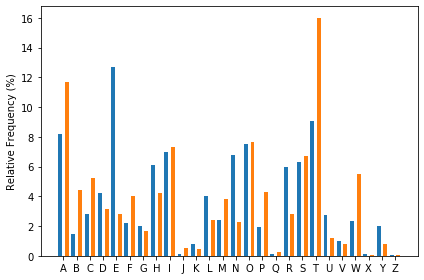

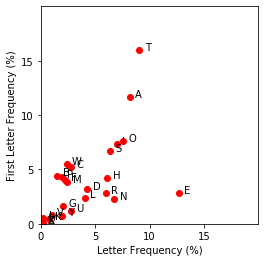

In [30]:
alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
letters = [i for i in alphabets]

lett_freq = np.array([
    8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094,
    6.966, 0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929,
    0.095, 5.987, 6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074
])

first_lett_freq = np.array([
    11.682, 4.434,5.238, 3.174, 2.799, 4.027,1.642, 4.200,7.294, 0.511,
    0.456, 2.415, 3.826, 2.284, 7.631, 4.319, 0.222, 2.826, 6.686, 15.978,
    1.183, 0.824, 5.497, 0.045, 0.763, 0.045
])

plt.bar(np.arange(len(lett_freq))-0.25,lett_freq,0.3)
plt.bar(np.arange(len(lett_freq))+0.25,first_lett_freq,0.3)
plt.xticks(range(len(lett_freq)),labels=letters)
plt.ylabel("Relative Frequency (%)")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.plot(lett_freq, first_lett_freq,'ro')
for i in range(len(lett_freq)):
    plt.text(lett_freq[i]+0.5, first_lett_freq[i], letters[i])
plt.xlim((0,20))
plt.ylim((0,20))
plt.xticks(range(0,20,5))
plt.yticks(range(0,20,5))
plt.xlabel('Letter Frequency (%)')
plt.ylabel('First Letter Frequency (%)')
ax.set_aspect(1.0)
plt.show()

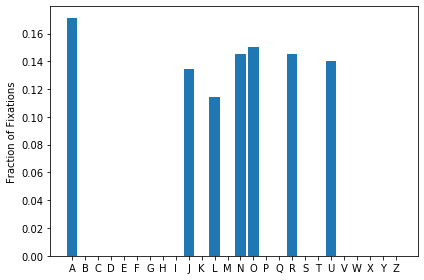

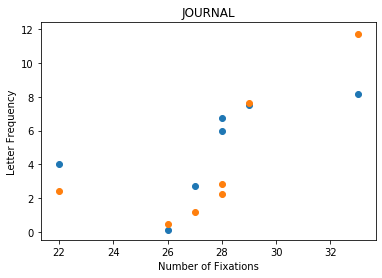

In [31]:
ans = 'JOURNAL'
str = 'AROJLUNULAROJLJORANULNULJORNAOJLJRANULUNARORAOROJLANARANULJRNUAOJORANLJLUNANUJONAUNAROJRALJLORANULUNRONAUNURUORJORLORAJORANUOJROJAROJALUJLUNARANLJNAUOROANOLORANUAJNLJORLUNAJORANAUOLUJAJUNUORAUJ'

numFix = np.zeros(len(letters))
for i,lett in enumerate(letters): 
    numFix[i] = len(strfind(str,lett))
    
plt.bar(np.arange(len(lett_freq)),numFix/np.sum(numFix))
plt.xticks(range(len(lett_freq)),labels=letters)
plt.ylabel("Fraction of Fixations")
plt.tight_layout()
plt.show()

plt.scatter(numFix[np.where(numFix>0)],lett_freq[np.where(numFix>0)])
plt.scatter(numFix[np.where(numFix>0)],first_lett_freq[np.where(numFix>0)])
plt.xlabel('Number of Fixations')
plt.ylabel('Letter Frequency')
plt.title(ans)
plt.show()
